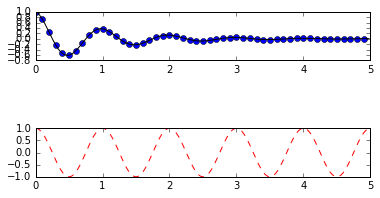

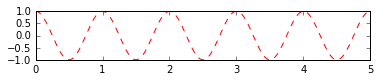

In [52]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

def f(t):
    return np.exp(-t) * np.cos(2*np.pi*t)

t1 = np.arange(0.0, 5.0, 0.1)
t2 = np.arange(0.0, 5.0, 0.02)

plt.figure(1)
plt.subplot(411)
plt.plot(t1, f(t1), 'bo', t2, f(t2), 'k')

plt.subplot(413)
plt.plot(t2, np.cos(2*np.pi*t2), 'r--')
plt.show()

plt.subplot(413)
plt.plot(t2, np.cos(2*np.pi*t2), 'r--')
plt.show()

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
df = pd.read_csv('stock_returns_base150.csv', skipinitialspace=True)

#print(__doc__)

import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm, datasets

from sklearn import datasets
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from itertools import product
from sklearn.ensemble import VotingClassifier
import numpy as np

# Loading some example data
#iris = datasets.load_iris()
# X = iris.data[:, [0,2]]
# print X
# y = iris.target
# print y
# Try to create a second dataframe df2 from df with all columns except 'B' and D

# This returns an error ("unhashable type: set")
# df2 = df[my_cols]
#'date', 'S1'
X = [df[0:50][val].values for val in df.columns if val != 'date' and val != 'S1']
#print 'X = {}'.format(X)
y = df[0:50]['S1'].values
#print X
#print 'dimensions of X = {},{}, dimensions of y = {},{}'.format(len(X),len(X[0]),len(y),len(y[0])) 

 # Training classifiers
clf1 = DecisionTreeClassifier(max_depth=4)
clf2 = KNeighborsClassifier(n_neighbors=7)
clf3 = SVC(kernel='rbf', probability=True)
eclf = VotingClassifier(estimators=[('dt', clf1), ('knn', clf2), ('svc', clf3)], voting='soft', weights=[2,1,2])
clf1 = clf1.fit(X,y)
clf2 = clf2.fit(X,y)
clf3 = clf3.fit(X,y)
eclf = eclf.fit(X,y)

# create a mesh to plot in
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

# title for the plots
titles = ['SVC with linear kernel',
          'LinearSVC (linear kernel)',
          'SVC with RBF kernel',
          'SVC with polynomial (degree 3) kernel']


for i, clf in enumerate((clf1, clf2, clf3, eclf)):
    # Plot the decision boundary. For that, we will assign a color to each
    # point in the mesh [x_min, m_max]x[y_min, y_max].
    # print i, clf
    plt.subplot(2, 2, i + 1)
    plt.subplots_adjust(wspace=0.4, hspace=0.4)

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, cmap=plt.cm.Paired, alpha=0.8)

    # Plot also the training points
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Paired)
    plt.xlabel('Sepal length')
    plt.ylabel('Sepal width')
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.xticks(())
    plt.yticks(())
    plt.title(titles[i])

plt.show()


print '\nAccuracy:\n'
for clf, label in zip([clf1, clf2, clf3, eclf], ['Logistic Regression', 'Random Forest', 'naive Bayes', 'Ensemble']):
    scores = cross_validation.cross_val_score(clf, X, y, cv=5, scoring='accuracy')
    print("Accuracy: %0.2f (+/- %0.2f) [%s]" % (scores.mean(), scores.std(), label))


ValueError: Unknown label type: array([[ 0.44653126],
       [ 0.24290149],
       [-0.32746792],
       [ 0.0980841 ],
       [ 0.12733395],
       [-0.92800271],
       [-0.24208581],
       [-0.12287372],
       [ 2.12944906],
       [-1.53762177],
       [ 2.17943657],
       [-0.60402148],
       [ 2.43560957],
       [-0.98186151],
       [ 0.78343558],
       [-1.10261334],
       [ 0.37872972],
       [-1.04672988],
       [ 0.27054188],
       [-0.20581053],
       [-0.63598821],
       [ 0.11521742],
       [-1.03218181],
       [-0.6489602 ],
       [ 0.08295147],
       [ 1.14571185],
       [ 0.54124445],
       [-0.91897926],
       [-0.06470128],
       [-0.81781583],
       [ 1.30487104],
       [ 0.66095945],
       [ 0.06355592],
       [ 0.17492249],
       [ 1.35880772],
       [-0.49656109],
       [-0.24309302],
       [-0.89369185],
       [ 1.04285368],
       [-0.35351878],
       [ 0.53862071],
       [ 0.19389076],
       [ 0.59486762],
       [-0.88095345],
       [ 1.30597038],
       [ 0.20831726],
       [ 1.88776932],
       [-0.82871953],
       [ 0.85050146],
       [-0.33124259]])

In [76]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score

%matplotlib inline
df = pd.read_csv('stock_returns_base150.csv', skipinitialspace=True)
df = df[0:100]
df['newDates'] =  pd.to_datetime([str(val).strip(' 0:00') for val in df['date'] if val is not np.nan])
df = df.drop('date',axis=1)

X = df.set_index(['newDates'])
X = X.loc[:,X.columns[1:]]
X = X.sum(axis=1)/X.shape[1]
naivePrediction = X[48:98].values
a = [0.37770974,-0.73307011,0.88773289,0.13026491,-1.86906431,1.52028684,0.15742395,-0.38432996,0.59800504,1.4368041,-2.76458525,0.48187279,0.81824333,-1.15907964,-0.14791345,2.60427284,-0.55643502,1.17828395,0.85551937,1.11863532,-0.95189415,1.68381162,-1.2285826,0.20917567,0.21139037,0.59982421,0.04832726,-1.04204633,0.53017159,-0.20220081,-1.9821128,0.56913762,0.60732677,-0.7248571,-0.52386703,0.01656557,0.79900966,-0.03771517,0.97580942,-2.23002944,2.20280162,-0.83724361,0.02633449,0.3757501,0.40947482,-1.05293429,0.16270305,0.79781595,0.45513208,1.51234413]
#print len(a)
#print 'accuracy = ',accuracy_score(naivePrediction, a)
print 'mean_squared_error = ',mean_squared_error(naivePrediction, a)

#X.loc[0:49,df.columns[1:]]

#naivePrediction = [ df[i+48][1:].sum()/len(df[i+48][1:]) for i,val in enumerate(modelPrediction)] 

 mean_squared_error =  2.77585635259


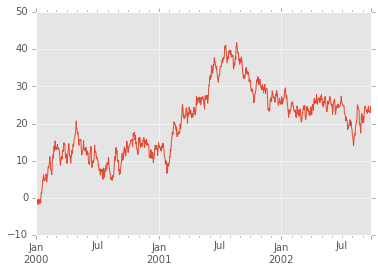

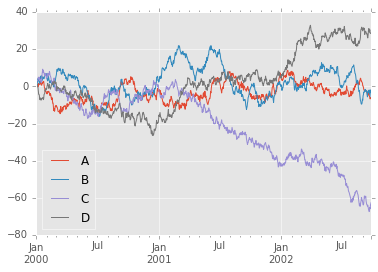

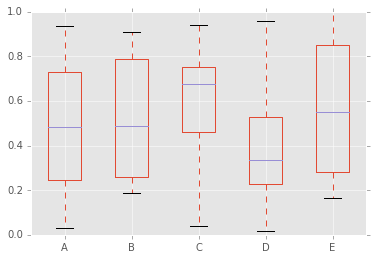

In [6]:
import matplotlib.pyplot as plt

import pandas as pd
import numpy as np 
%matplotlib inline

import matplotlib
matplotlib.style.use('ggplot')

ts = pd.Series(np.random.randn(1000), index=pd.date_range('1/1/2000', periods=1000))
ts = ts.cumsum()
ts.plot()

df = pd.DataFrame(np.random.randn(1000, 4), index=ts.index, columns=list('ABCD'))
df = df.cumsum()
plt.figure()
df.plot()

df = pd.DataFrame(np.random.rand(10, 5), columns=['A', 'B', 'C', 'D', 'E'])
df.plot.box()

In [39]:
import pandas as pd
from sklearn.decomposition import PCA
import numpy as np 
import random
from sklearn.grid_search import GridSearchCV
from sklearn import cross_validation
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier
%matplotlib inline
from sklearn.neighbors import KNeighborsClassifier

df = pd.read_csv('stock_returns_base150.csv', skipinitialspace=True)
df = df[0:100]

df['newDates'] =  pd.to_datetime([str(val).strip(' 0:00') for val in df['date'] if val is not np.nan])
df = df.drop('date',axis=1)

y = df.loc[0:49,['newDates','S1']]
X = df.loc[0:49,df.columns[1:]]

X = X.set_index(['newDates'])
y = y.set_index(['newDates'])

# X = np.asmatrix(X)
# y = np.asarray(y,dtype="|S6")

print 'Target set description'
y.describe()

Target set description


,S1
count,50.000000
mean,0.118352
std,0.930020
min,-1.537622
25%,-0.627997
50%,0.090518
75%,0.581462
max,2.435610


In [15]:
print X.head()

                  S2        S3        S4        S5        S6        S7  \
newDates                                                                 
2014-05-30 -0.828505  1.268874  1.468834  1.207883  0.622798  1.821350   
2014-06-02 -0.245839 -0.558069 -0.990142 -0.497502 -0.137380  0.158878   
2014-06-03 -0.745564  0.254992  0.322715  0.832613  0.091484 -0.405513   
2014-06-04 -0.636639 -0.840802  0.643013  0.167639  0.017852  0.293241   
2014-06-05 -0.710122  1.396653  0.135177  1.888105  0.583958  0.949694   

                  S8        S9       S10  
newDates                                  
2014-05-30 -0.699674  1.890508  0.523177  
2014-06-02  0.081083 -1.311177  0.175995  
2014-06-03 -0.323873  0.920877 -0.066132  
2014-06-04  0.871516  0.201038 -0.166004  
2014-06-05  0.428746  1.050444  1.196328  


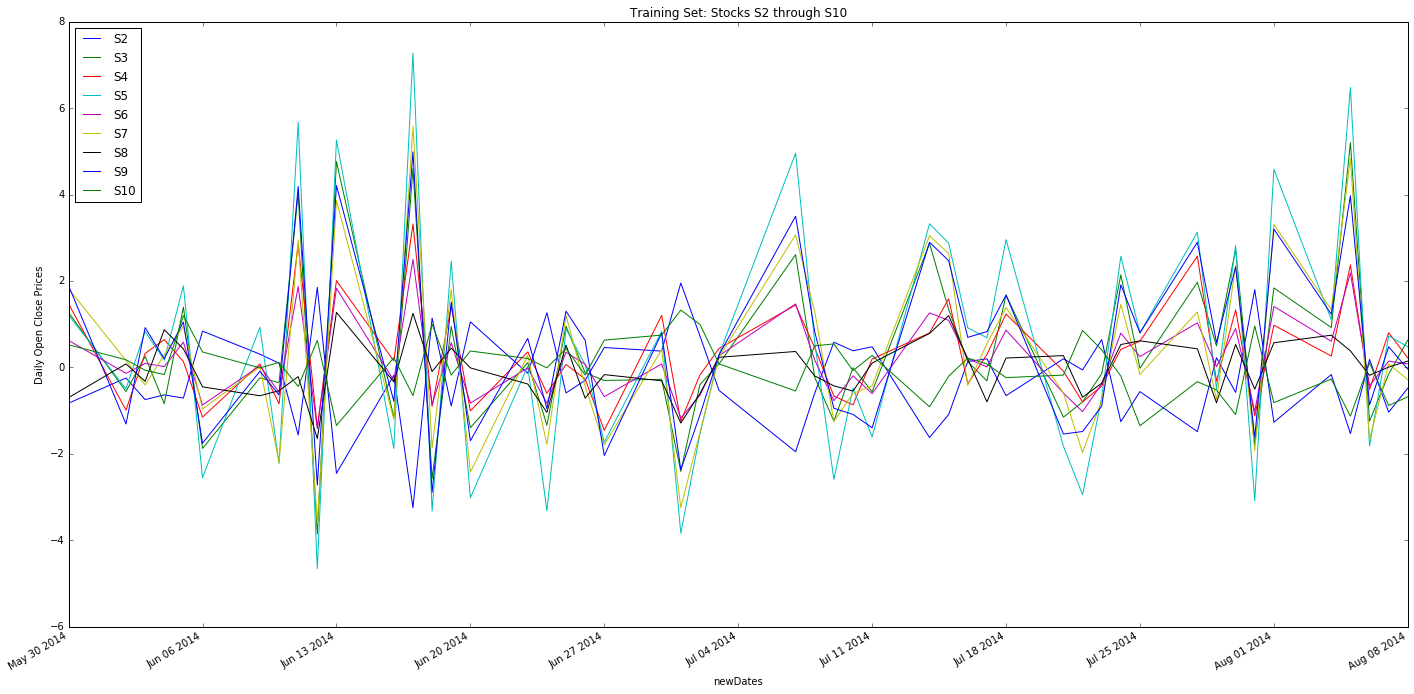

In [21]:
Xplot = X[:].plot(figsize=(24,12),title='Training Set: Stocks S2 through S10')
Xplot.set_ylabel('Daily Open Close Prices');

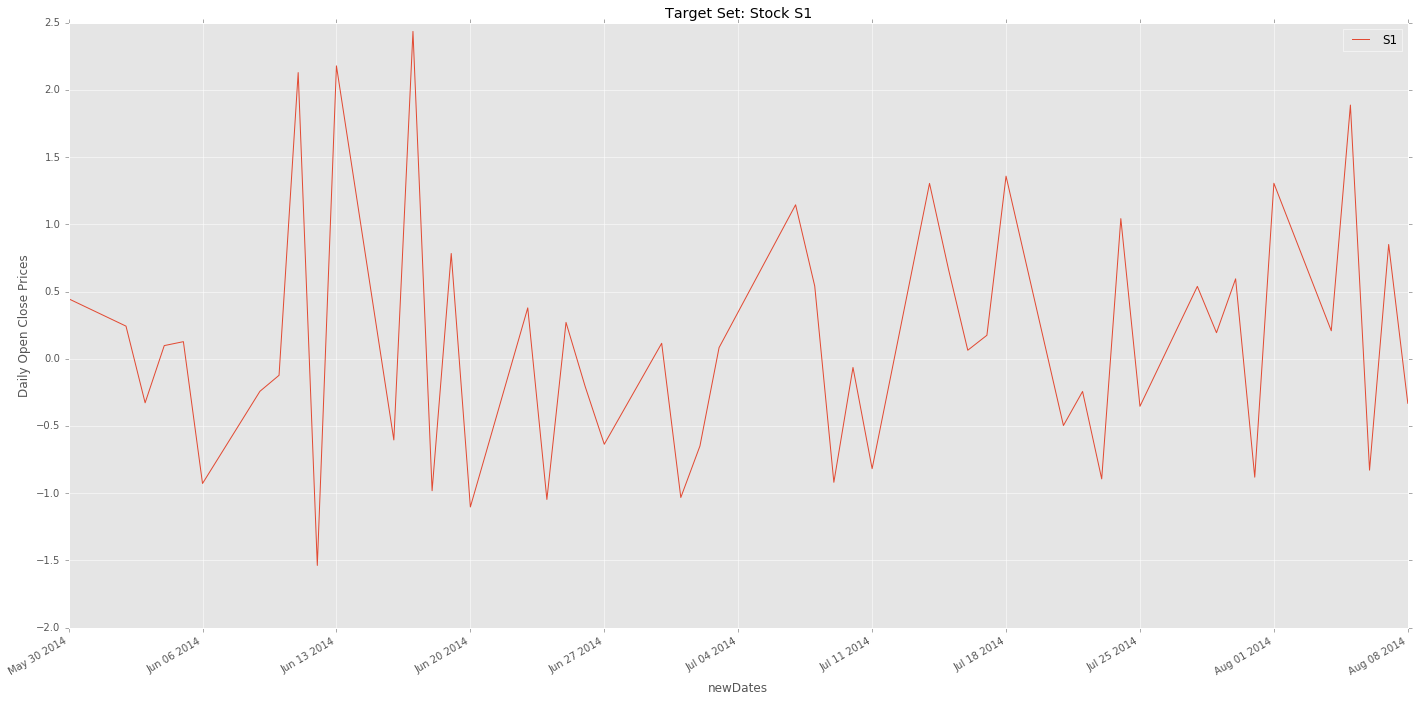

In [17]:
yplot = y[:].plot(figsize=(24,12),title='Target Set: Stock S1')
yplot.set_ylabel('Daily Open Close Prices');

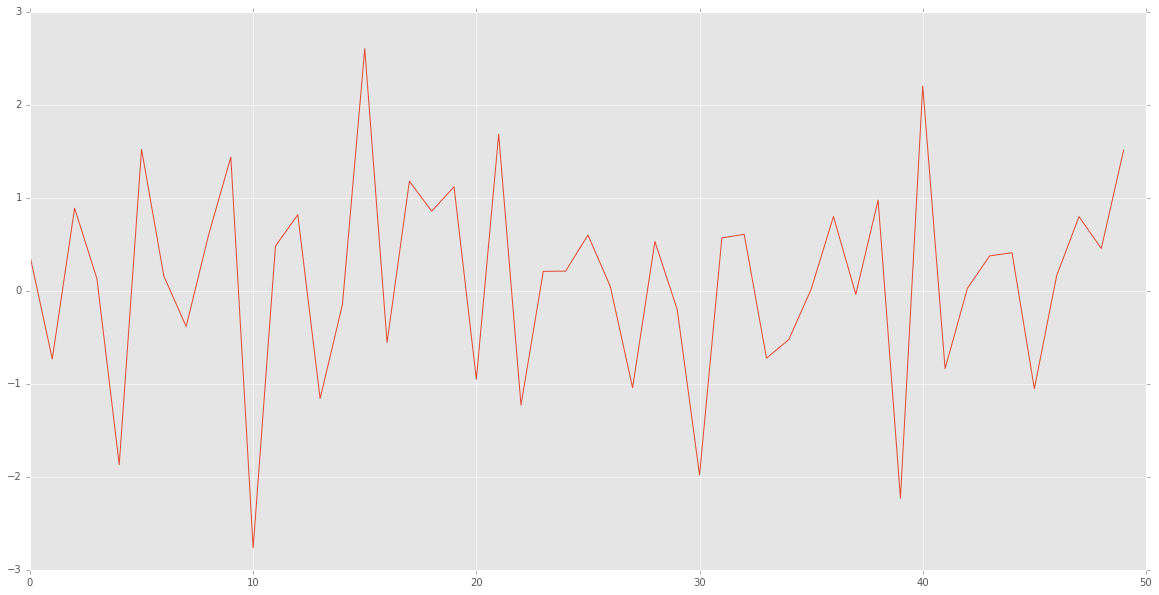

In [29]:
a = [0.37770974,-0.73307011,0.88773289,0.13026491,-1.86906431,1.52028684,0.15742395,-0.38432996,0.59800504,1.4368041,-2.76458525,0.48187279,0.81824333,-1.15907964,-0.14791345,2.60427284,-0.55643502,1.17828395,0.85551937,1.11863532,-0.95189415,1.68381162,-1.2285826,0.20917567,0.21139037,0.59982421,0.04832726,-1.04204633,0.53017159,-0.20220081,-1.9821128,0.56913762,0.60732677,-0.7248571,-0.52386703,0.01656557,0.79900966,-0.03771517,0.97580942,-2.23002944,2.20280162,-0.83724361,0.02633449,0.3757501,0.40947482,-1.05293429,0.16270305,0.79781595,0.45513208,1.51234413]
plt.figure(figsize=(20,10))
plt.plot([i for i,j in enumerate(a)], a)

In [11]:
from sklearn import datasets
from sklearn import cross_validation
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier

iris = datasets.load_iris()
X, y = iris.data[:, 1:3], iris.target

clf1 = LogisticRegression(random_state=1)
clf2 = RandomForestClassifier(random_state=1)
clf3 = GaussianNB()
eclf = VotingClassifier(estimators=[('lr', clf1), ('rf', clf2), ('gnb', clf3)], voting='hard')

for clf, label in zip([clf1, clf2, clf3, eclf], ['Logistic Regression', 'Random Forest', 'naive Bayes', 'Ensemble']):
    scores = cross_validation.cross_val_score(clf, X, y, cv=5, scoring='accuracy')
    print("Accuracy: %0.2f (+/- %0.2f) [%s]" % (scores.mean(), scores.std(), label))

Accuracy: 0.90 (+/- 0.05) [Logistic Regression]
Accuracy: 0.93 (+/- 0.05) [Random Forest]
Accuracy: 0.91 (+/- 0.04) [naive Bayes]
Accuracy: 0.95 (+/- 0.05) [Ensemble]


In [ ]:
#print [method for method in dir(X) if callable(getattr(X, method))]


In [12]:
from sklearn import datasets
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from itertools import product
from sklearn.ensemble import VotingClassifier

# # Loading some example data
# iris = datasets.load_iris()
# X = iris.data[:, [0,2]]
# y = iris.target
X_train = np.asmatrix(X)
y_train = np.asarray(y,dtype="|S6")
#print list(X_train)

# Training classifiers
clf1 = DecisionTreeClassifier(max_depth=4)
clf2 = KNeighborsClassifier(n_neighbors=7)
clf3 = SVC(kernel='rbf', probability=True)
eclf = VotingClassifier(estimators=[('dt', clf1), ('knn', clf2), ('svc', clf3)], voting='soft', weights=[2,1,2])

clf1 = clf1.fit(X_train,y_train)
clf2 = clf2.fit(X_train,y_train)
clf3 = clf3.fit(X_train,y_train)
eclf = eclf.fit(X_train,y_train)

#print [method for method in dir(clf2) if callable(getattr(clf2, method))]
print '\n',clf1.score


<bound method DecisionTreeClassifier.score of DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=4,
            max_features=None, max_leaf_nodes=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')>


In [37]:
import pandas as pd
from sklearn.decomposition import PCA
import numpy as np 
import random
from sklearn.grid_search import GridSearchCV
from sklearn import cross_validation
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.neighbors import KNeighborsClassifier

df = pd.read_csv('stock_returns_base150.csv', skipinitialspace=True)
df = df[0:100]

df['newDates'] =  pd.to_datetime([str(val).strip(' 0:00') for val in df['date'] if val is not np.nan])
df = df.drop('date',axis=1)

y = df.loc[0:49,['newDates','S1']]
X = df.loc[0:49,df.columns[1:]]

X = X.set_index(['newDates'])
y = y.set_index(['newDates'])

X = np.asmatrix(X)
y = np.asarray(y,dtype="|S6")

## PCA
#for nComp in range(2,10):
nComp = 7
pca = PCA(n_components=nComp)
X_pca = np.asmatrix(pca.fit_transform(X))

print 'n = {}, explained variance for PCA = {}'.format(pca.n_components, pca.explained_variance_ratio_)

## ensemble 
#linear regression or general linear model, logistical regression, and k nearest neighbors

clf1 = LogisticRegression(random_state=1)
clf2 = RandomForestClassifier(random_state=1)
clf3 = KNeighborsClassifier(n_neighbors=7)
eclf = VotingClassifier(estimators=[('lr', clf1), ('rf', clf2), ('knn', clf3)], voting='soft')

params = {'lr__C': [1.0, 100.0]} # 'rf__n_estimators': [20, 200]

grid = GridSearchCV(estimator=eclf, param_grid=params, cv=4)
print X_pca.shape
grid = grid.fit(X_pca, y)

# print results


n = 7, explained variance for PCA = [ 0.93365598  0.01508354  0.01428346  0.01170304  0.00814254  0.00680071
  0.0057823 ]
(50, 7)


IndexError: too many indices for array

In [27]:
from sklearn.decomposition import PCA
from sklearn.grid_search import GridSearchCV
from sklearn import grid_search
from sklearn import cross_validation
from sklearn.neighbors import KNeighborsClassifier
from sklearn import linear_model
from sklearn import neighbors
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt

#dataframe

df = pd.read_csv('stock_returns_base150.csv', skipinitialspace=True)
df = df[0:100]

df['newDates'] =  pd.to_datetime([str(val).strip(' 0:00') for val in df['date'] if val is not np.nan])
df = df.drop('date',axis=1)

y = df.loc[0:49,['newDates','S1']]
X = df.loc[0:49,df.columns[1:]]

X = X.set_index(['newDates'])
y = y.set_index(['newDates'])

# X = np.asmatrix(X)
# yy = y
# y = np.asarray(y.values.ravel(),dtype="|S6")

toPredict = df.loc[50:100,df.columns[1:]]
toPredict = toPredict.set_index(['newDates'])
#toPredict = np.asmatrix(toPredict)


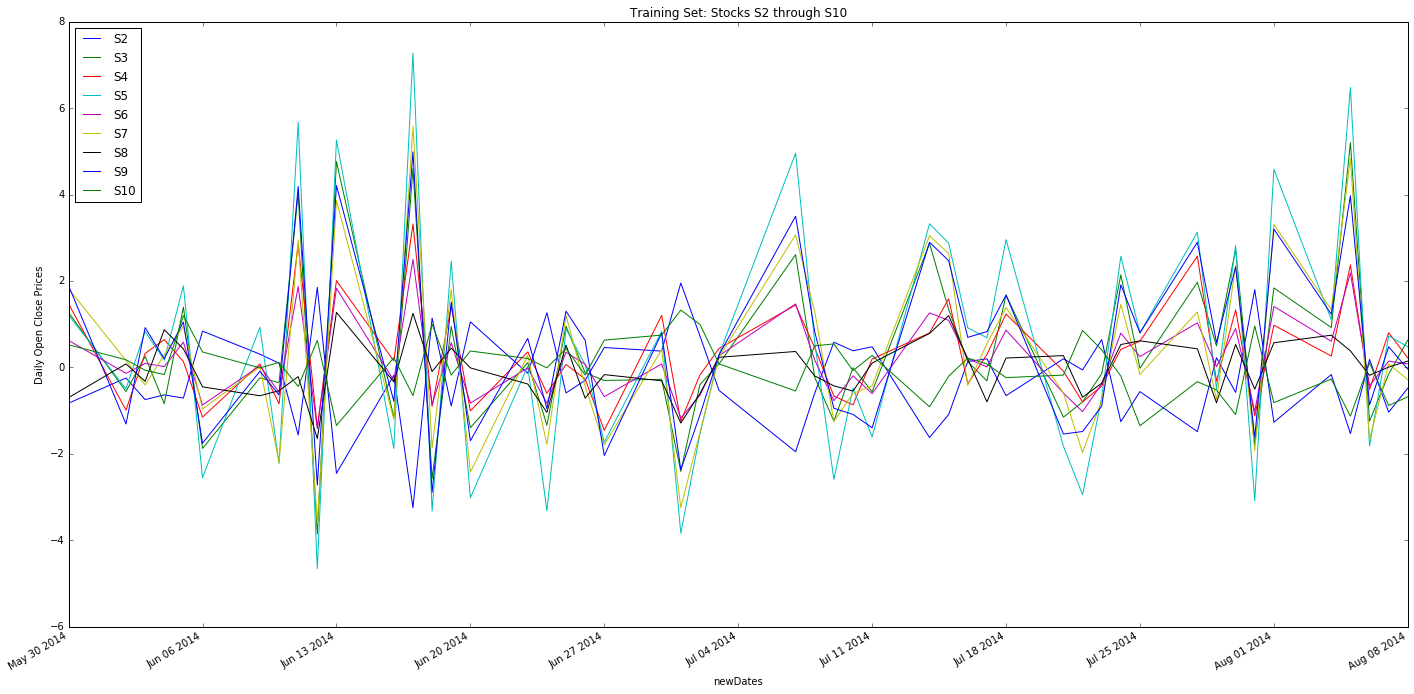

In [23]:
Xplot = X[:].plot(figsize=(24,12),title='Training Set: Stocks S2 through S10')
Xplot.set_ylabel('Daily Open Close Prices');

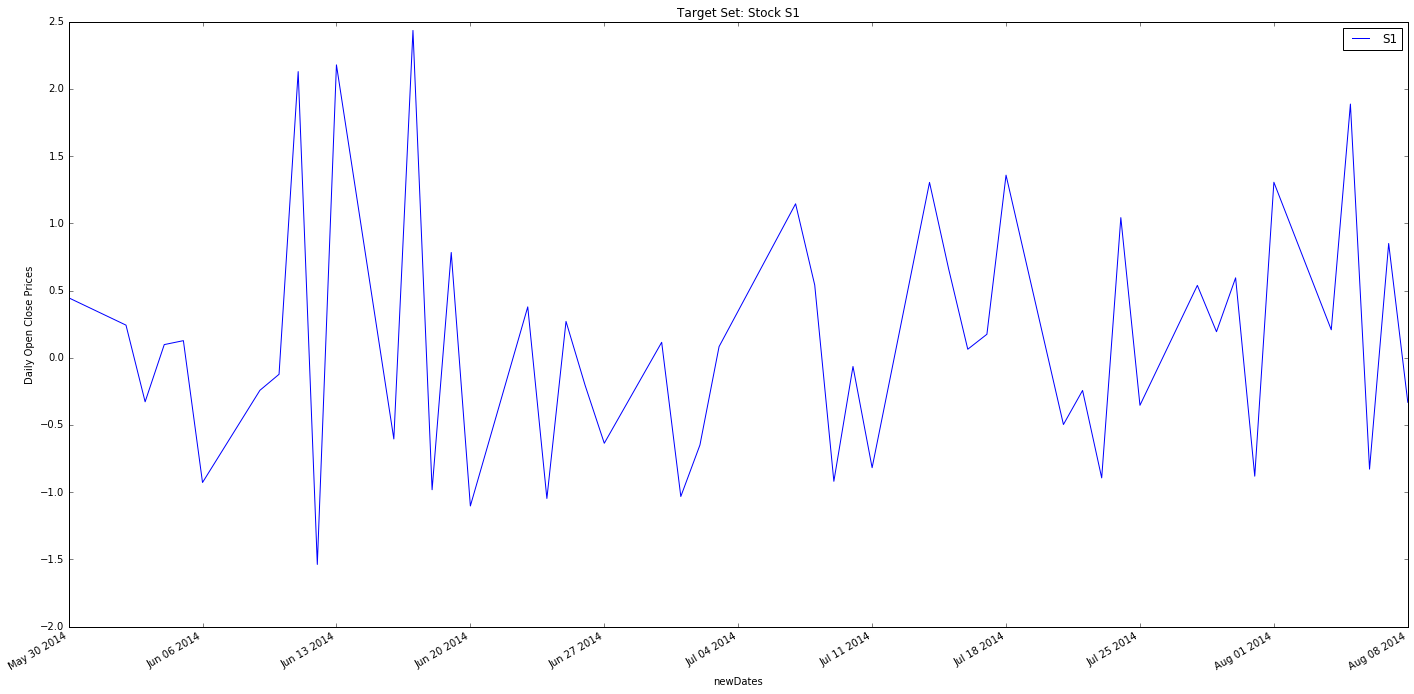

In [24]:
yplot = y[:].plot(figsize=(24,12),title='Target Set: Stock S1')
yplot.set_ylabel('Daily Open Close Prices');

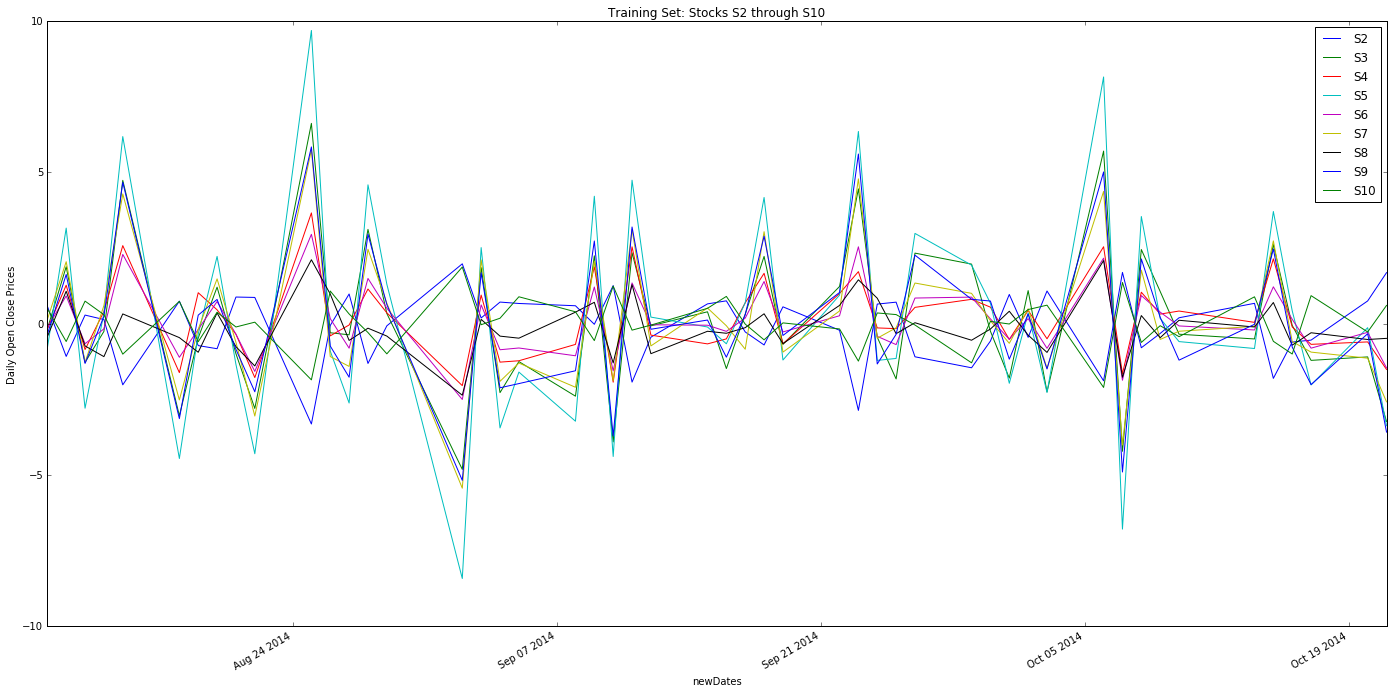

In [28]:
Xplot = toPredict[:].plot(figsize=(24,12),title='Training Set: Stocks S2 through S10')
Xplot.set_ylabel('Daily Open Close Prices');

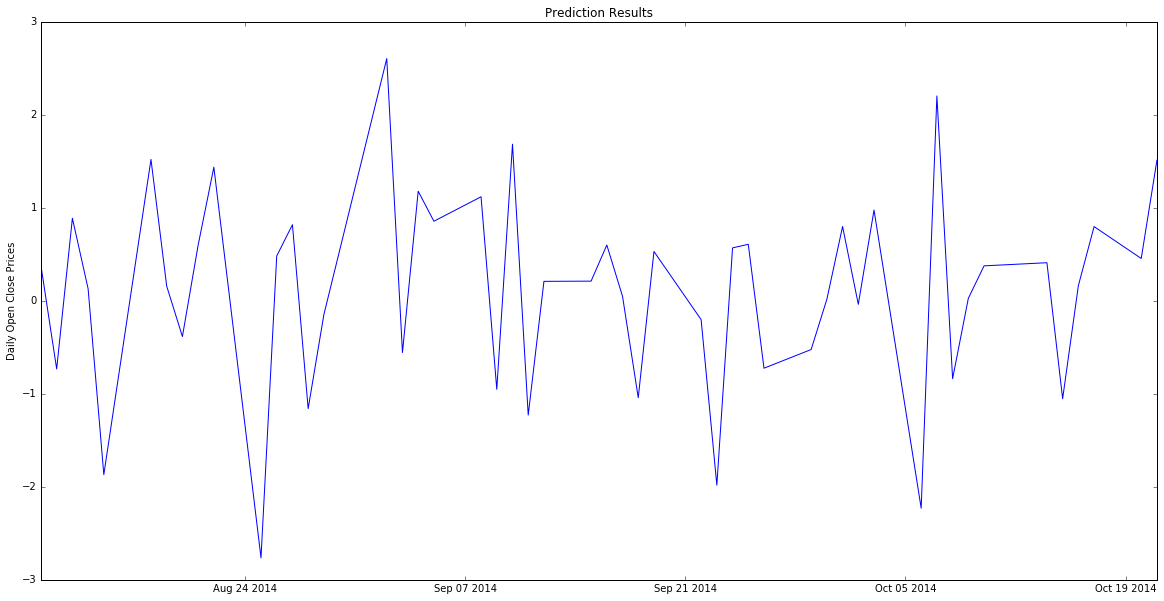

In [38]:
import matplotlib.pyplot as plt
a = [0.37770974,-0.73307011,0.88773289,0.13026491,-1.86906431,1.52028684,0.15742395,-0.38432996,0.59800504,1.4368041,-2.76458525,0.48187279,0.81824333,-1.15907964,-0.14791345,2.60427284,-0.55643502,1.17828395,0.85551937,1.11863532,-0.95189415,1.68381162,-1.2285826,0.20917567,0.21139037,0.59982421,0.04832726,-1.04204633,0.53017159,-0.20220081,-1.9821128,0.56913762,0.60732677,-0.7248571,-0.52386703,0.01656557,0.79900966,-0.03771517,0.97580942,-2.23002944,2.20280162,-0.83724361,0.02633449,0.3757501,0.40947482,-1.05293429,0.16270305,0.79781595,0.45513208,1.51234413]
plt.figure(figsize=(20,10))
plt.plot(df['newDates'][50:100], a)
plt.ylabel('Daily Open Close Prices')
plt.title('Prediction Results')